In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bhopal_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Bhopal.csv', skiprows = 2, delimiter=',')
bhopal_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.1,92,0.0,954.6,7.6,17.8,95,111
1,2024-01-01T01:00,14.9,92,0.0,955.3,8.0,19.5,108,120
2,2024-01-01T02:00,15.0,92,0.0,955.6,8.1,18.5,111,123
3,2024-01-01T03:00,17.2,84,0.0,956.7,9.0,17.7,113,129
4,2024-01-01T04:00,19.9,74,0.0,958.0,8.2,14.3,128,137
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,95,0.0,957.2,7.1,17.4,49,54
8780,2024-12-31T20:00,13.6,95,0.0,956.7,6.5,16.4,46,50
8781,2024-12-31T21:00,13.1,96,0.0,956.1,6.1,15.6,45,49
8782,2024-12-31T22:00,12.7,96,0.0,955.7,6.0,15.4,46,47


In [3]:
bhopal_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Bhopal.csv', delimiter= ',')
bhopal_pollutants['Timestamp'] = bhopal_meteo['time']
bhopal_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bhopal_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,139.75,247.12,15.92,42.76,35.70,30.62,6.20,0.84,6.70,...,0.65,16.57,84.00,0.57,172.88,0.0,0.0,16.50,NaN,NaN
1,2024-01-01T01:00,138.38,244.25,8.88,38.20,27.51,27.44,6.00,0.66,14.28,...,0.65,16.41,81.75,0.61,193.75,0.0,0.0,16.50,NaN,NaN
2,2024-01-01T02:00,124.88,209.88,8.22,38.54,27.15,25.05,6.33,0.76,12.70,...,0.65,16.05,82.62,0.64,205.62,0.0,0.0,16.50,NaN,NaN
3,2024-01-01T03:00,118.38,205.25,6.46,35.41,24.10,22.81,6.64,0.70,14.20,...,0.65,15.78,83.16,0.60,146.58,0.0,0.0,16.50,NaN,NaN
4,2024-01-01T04:00,108.88,181.50,3.48,33.15,20.45,23.66,7.00,0.70,12.18,...,0.65,15.42,83.88,0.65,161.00,0.0,0.0,16.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,69.00,115.00,5.18,43.78,27.48,98.22,13.48,1.54,8.88,...,NaN,15.98,78.25,0.48,113.50,0.0,0.0,36.00,711.00,NaN
8780,2024-12-31T20:00,85.00,128.00,5.45,48.72,30.32,105.60,14.13,1.74,6.02,...,NaN,15.22,80.50,0.35,121.25,0.0,0.0,39.50,711.00,NaN
8781,2024-12-31T21:00,105.25,145.50,4.22,49.75,29.90,108.22,13.95,1.57,8.57,...,NaN,14.35,81.00,0.30,86.75,0.0,0.0,37.25,711.75,NaN
8782,2024-12-31T22:00,99.75,136.75,3.45,48.38,28.52,102.82,21.60,1.65,6.12,...,NaN,14.20,82.00,0.30,81.75,0.0,0.0,40.00,711.75,NaN


In [4]:
bhopal = pd.merge(bhopal_meteo.iloc[:, :], bhopal_pollutants.iloc[:, 0:3], on='time')
bhopal

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.1,92,0.0,954.6,7.6,17.8,95,111,139.75,247.12
1,2024-01-01T01:00,14.9,92,0.0,955.3,8.0,19.5,108,120,138.38,244.25
2,2024-01-01T02:00,15.0,92,0.0,955.6,8.1,18.5,111,123,124.88,209.88
3,2024-01-01T03:00,17.2,84,0.0,956.7,9.0,17.7,113,129,118.38,205.25
4,2024-01-01T04:00,19.9,74,0.0,958.0,8.2,14.3,128,137,108.88,181.50
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,95,0.0,957.2,7.1,17.4,49,54,69.00,115.00
8780,2024-12-31T20:00,13.6,95,0.0,956.7,6.5,16.4,46,50,85.00,128.00
8781,2024-12-31T21:00,13.1,96,0.0,956.1,6.1,15.6,45,49,105.25,145.50
8782,2024-12-31T22:00,12.7,96,0.0,955.7,6.0,15.4,46,47,99.75,136.75


In [5]:
bhopal['city'] = 'Bhopal'
bhopal

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,15.1,92,0.0,954.6,7.6,17.8,95,111,139.75,247.12,Bhopal
1,2024-01-01T01:00,14.9,92,0.0,955.3,8.0,19.5,108,120,138.38,244.25,Bhopal
2,2024-01-01T02:00,15.0,92,0.0,955.6,8.1,18.5,111,123,124.88,209.88,Bhopal
3,2024-01-01T03:00,17.2,84,0.0,956.7,9.0,17.7,113,129,118.38,205.25,Bhopal
4,2024-01-01T04:00,19.9,74,0.0,958.0,8.2,14.3,128,137,108.88,181.50,Bhopal
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,95,0.0,957.2,7.1,17.4,49,54,69.00,115.00,Bhopal
8780,2024-12-31T20:00,13.6,95,0.0,956.7,6.5,16.4,46,50,85.00,128.00,Bhopal
8781,2024-12-31T21:00,13.1,96,0.0,956.1,6.1,15.6,45,49,105.25,145.50,Bhopal
8782,2024-12-31T22:00,12.7,96,0.0,955.7,6.0,15.4,46,47,99.75,136.75,Bhopal


In [6]:
bhopal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8767 non-null   float64
 10  PM10 (µg/m³)              8767 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
bhopal = bhopal.interpolate()
bhopal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bhopal[delay1_col] = bhopal[col].shift(1)
    delay2_col = col + "_delay2"
    bhopal[delay2_col] = bhopal[col].shift(2)
    bhopal.loc[0, delay1_col] = bhopal[col].iloc[-1]
    bhopal.loc[1, delay2_col] = bhopal[col].iloc[-1]
    bhopal.loc[0, delay2_col] = bhopal[col].iloc[-2]

bhopal

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.1,92,0.0,954.6,7.6,17.8,95,111,139.75,247.12,Bhopal,90.00,99.75,142.00,136.75
1,2024-01-01T01:00,14.9,92,0.0,955.3,8.0,19.5,108,120,138.38,244.25,Bhopal,139.75,90.00,247.12,142.00
2,2024-01-01T02:00,15.0,92,0.0,955.6,8.1,18.5,111,123,124.88,209.88,Bhopal,138.38,139.75,244.25,247.12
3,2024-01-01T03:00,17.2,84,0.0,956.7,9.0,17.7,113,129,118.38,205.25,Bhopal,124.88,138.38,209.88,244.25
4,2024-01-01T04:00,19.9,74,0.0,958.0,8.2,14.3,128,137,108.88,181.50,Bhopal,118.38,124.88,205.25,209.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.2,95,0.0,957.2,7.1,17.4,49,54,69.00,115.00,Bhopal,55.50,49.75,102.50,97.50
8780,2024-12-31T20:00,13.6,95,0.0,956.7,6.5,16.4,46,50,85.00,128.00,Bhopal,69.00,55.50,115.00,102.50
8781,2024-12-31T21:00,13.1,96,0.0,956.1,6.1,15.6,45,49,105.25,145.50,Bhopal,85.00,69.00,128.00,115.00
8782,2024-12-31T22:00,12.7,96,0.0,955.7,6.0,15.4,46,47,99.75,136.75,Bhopal,105.25,85.00,145.50,128.00


In [9]:
dewas_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Dewas.csv', skiprows=2, delimiter=',')
dewas_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.8,97,0.0,951.7,6.6,9.4,61,97
1,2024-01-01T01:00,14.3,97,0.0,952.5,7.4,9.7,61,105
2,2024-01-01T02:00,14.9,96,0.0,953.1,4.9,10.8,73,116
3,2024-01-01T03:00,17.9,83,0.0,954.3,6.5,11.4,90,118
4,2024-01-01T04:00,21.0,70,0.0,955.5,6.0,9.2,107,121
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.6,94,0.0,955.2,8.7,18.5,37,49
8780,2024-12-31T20:00,14.9,96,0.0,954.6,8.0,17.7,50,57
8781,2024-12-31T21:00,14.3,96,0.0,954.0,7.5,16.8,57,62
8782,2024-12-31T22:00,13.8,98,0.0,953.5,6.8,15.8,58,64


In [10]:
dewas_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Dewas.csv', delimiter= ',')
dewas_pollutants['Timestamp'] = dewas_meteo['time']
dewas_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
dewas_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,96.00,151.75,2.38,9.70,7.08,12.60,26.20,0.64,24.70,...,NaN,22.12,74.25,1.75,58.75,NaN,0.0,6.00,NaN,NaN
1,2024-01-01T01:00,102.00,167.75,3.15,9.90,7.80,12.45,24.18,0.67,17.48,...,NaN,21.82,77.25,1.15,49.25,NaN,0.0,6.00,NaN,NaN
2,2024-01-01T02:00,109.50,197.50,2.72,9.95,7.48,12.42,24.02,0.60,14.23,...,NaN,21.42,79.00,1.30,46.50,NaN,0.0,6.25,NaN,NaN
3,2024-01-01T03:00,104.25,159.25,2.42,9.75,7.15,12.28,32.10,0.55,16.85,...,NaN,20.90,80.50,0.85,63.75,NaN,0.0,6.00,NaN,NaN
4,2024-01-01T04:00,99.50,144.75,3.08,9.90,7.72,12.22,31.82,0.55,14.15,...,NaN,20.50,81.75,1.80,49.00,NaN,0.0,6.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,78.00,145.00,11.75,56.40,39.52,28.90,42.55,0.65,24.08,...,NaN,21.92,42.25,2.85,243.50,NaN,0.0,6.00,NaN,NaN
8780,2024-12-31T20:00,78.75,128.50,13.35,54.68,39.95,28.05,43.42,0.54,24.50,...,NaN,21.40,40.75,2.55,245.75,NaN,0.0,6.00,NaN,NaN
8781,2024-12-31T21:00,82.25,125.00,15.48,57.78,43.30,27.05,46.75,0.58,22.82,...,NaN,21.12,39.75,2.02,255.00,NaN,0.0,6.00,NaN,NaN
8782,2024-12-31T22:00,83.75,127.00,19.27,60.12,47.65,26.58,46.78,0.59,22.18,...,NaN,20.72,39.25,2.02,250.50,NaN,0.0,6.00,NaN,NaN


In [11]:
dewas = pd.merge(dewas_meteo.iloc[:, :], dewas_pollutants.iloc[:, 0:3], on='time')
dewas

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.8,97,0.0,951.7,6.6,9.4,61,97,96.00,151.75
1,2024-01-01T01:00,14.3,97,0.0,952.5,7.4,9.7,61,105,102.00,167.75
2,2024-01-01T02:00,14.9,96,0.0,953.1,4.9,10.8,73,116,109.50,197.50
3,2024-01-01T03:00,17.9,83,0.0,954.3,6.5,11.4,90,118,104.25,159.25
4,2024-01-01T04:00,21.0,70,0.0,955.5,6.0,9.2,107,121,99.50,144.75
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.6,94,0.0,955.2,8.7,18.5,37,49,78.00,145.00
8780,2024-12-31T20:00,14.9,96,0.0,954.6,8.0,17.7,50,57,78.75,128.50
8781,2024-12-31T21:00,14.3,96,0.0,954.0,7.5,16.8,57,62,82.25,125.00
8782,2024-12-31T22:00,13.8,98,0.0,953.5,6.8,15.8,58,64,83.75,127.00


In [12]:
dewas['city'] = 'Dewas'
dewas

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,14.8,97,0.0,951.7,6.6,9.4,61,97,96.00,151.75,Dewas
1,2024-01-01T01:00,14.3,97,0.0,952.5,7.4,9.7,61,105,102.00,167.75,Dewas
2,2024-01-01T02:00,14.9,96,0.0,953.1,4.9,10.8,73,116,109.50,197.50,Dewas
3,2024-01-01T03:00,17.9,83,0.0,954.3,6.5,11.4,90,118,104.25,159.25,Dewas
4,2024-01-01T04:00,21.0,70,0.0,955.5,6.0,9.2,107,121,99.50,144.75,Dewas
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.6,94,0.0,955.2,8.7,18.5,37,49,78.00,145.00,Dewas
8780,2024-12-31T20:00,14.9,96,0.0,954.6,8.0,17.7,50,57,78.75,128.50,Dewas
8781,2024-12-31T21:00,14.3,96,0.0,954.0,7.5,16.8,57,62,82.25,125.00,Dewas
8782,2024-12-31T22:00,13.8,98,0.0,953.5,6.8,15.8,58,64,83.75,127.00,Dewas


In [13]:
dewas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7958 non-null   float64
 10  PM10 (µg/m³)              7919 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
dewas = dewas.interpolate()
dewas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    dewas[delay1_col] = dewas[col].shift(1)
    delay2_col = col + "_delay2"
    dewas[delay2_col] = dewas[col].shift(2)
    dewas.loc[0, delay1_col] = dewas[col].iloc[-1]
    dewas.loc[1, delay2_col] = dewas[col].iloc[-1]
    dewas.loc[0, delay2_col] = dewas[col].iloc[-2]

dewas

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.8,97,0.0,951.7,6.6,9.4,61,97,96.00,151.75,Dewas,77.00,83.75,124.00,127.00
1,2024-01-01T01:00,14.3,97,0.0,952.5,7.4,9.7,61,105,102.00,167.75,Dewas,96.00,77.00,151.75,124.00
2,2024-01-01T02:00,14.9,96,0.0,953.1,4.9,10.8,73,116,109.50,197.50,Dewas,102.00,96.00,167.75,151.75
3,2024-01-01T03:00,17.9,83,0.0,954.3,6.5,11.4,90,118,104.25,159.25,Dewas,109.50,102.00,197.50,167.75
4,2024-01-01T04:00,21.0,70,0.0,955.5,6.0,9.2,107,121,99.50,144.75,Dewas,104.25,109.50,159.25,197.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.6,94,0.0,955.2,8.7,18.5,37,49,78.00,145.00,Dewas,69.75,67.00,117.00,102.25
8780,2024-12-31T20:00,14.9,96,0.0,954.6,8.0,17.7,50,57,78.75,128.50,Dewas,78.00,69.75,145.00,117.00
8781,2024-12-31T21:00,14.3,96,0.0,954.0,7.5,16.8,57,62,82.25,125.00,Dewas,78.75,78.00,128.50,145.00
8782,2024-12-31T22:00,13.8,98,0.0,953.5,6.8,15.8,58,64,83.75,127.00,Dewas,82.25,78.75,125.00,128.50


In [16]:
gwalior_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Gwalior.csv', skiprows=2, delimiter=',')
gwalior_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,9.2,96,0.0,991.2,7.0,8.9,12,43
1,2024-01-01T01:00,10.1,93,0.0,992.5,4.9,9.6,17,34
2,2024-01-01T02:00,11.0,87,0.0,993.0,4.9,10.9,36,44
3,2024-01-01T03:00,11.6,84,0.0,993.8,5.4,10.5,42,49
4,2024-01-01T04:00,12.6,80,0.0,994.4,4.4,6.8,55,58
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.0,95,0.0,993.6,2.0,8.3,297,358
8780,2024-12-31T20:00,8.6,95,0.0,993.1,3.5,9.8,305,347
8781,2024-12-31T21:00,8.0,97,0.0,992.3,4.6,10.9,306,343
8782,2024-12-31T22:00,7.8,97,0.0,991.9,4.8,11.1,292,331


In [17]:
gwalior_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Gwalior.csv', delimiter= ',')
gwalior_pollutants['Timestamp'] = gwalior_meteo['time']
gwalior_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
gwalior_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,55.02,111.47,3.22,14.04,9.30,27.54,11.30,0.85,28.25,...,NaN,11.86,92.08,0.74,126.67,0.0,0.0,12.00,745.00,NaN
1,2024-01-01T01:00,49.34,115.86,3.21,12.66,8.41,26.67,11.28,0.86,30.52,...,NaN,11.72,92.69,0.74,105.67,0.0,0.0,11.92,745.00,NaN
2,2024-01-01T02:00,43.61,101.68,3.17,11.34,7.70,26.21,11.71,1.07,32.97,...,NaN,11.69,93.11,0.70,141.08,0.0,0.0,12.00,745.00,NaN
3,2024-01-01T03:00,40.67,104.10,2.97,10.56,7.50,25.81,8.47,0.98,36.57,...,0.10,11.73,92.67,0.90,121.50,0.0,0.0,12.25,745.00,NaN
4,2024-01-01T04:00,46.06,120.10,2.90,10.42,7.13,26.51,9.89,1.14,38.75,...,NaN,11.77,91.67,1.03,124.75,0.0,0.0,11.92,745.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,56.31,119.28,1.68,20.67,11.69,11.54,16.95,1.54,17.90,...,0.98,10.74,84.78,0.71,211.00,0.0,0.0,12.00,747.25,NaN
8780,2024-12-31T20:00,59.50,124.75,1.36,17.22,9.61,10.63,14.53,1.16,24.37,...,1.00,11.21,85.00,0.98,106.75,0.0,0.0,13.83,748.00,NaN
8781,2024-12-31T21:00,59.17,120.69,1.51,13.07,7.52,9.98,13.75,0.94,30.73,...,0.90,11.47,83.58,0.93,133.75,0.0,0.0,13.08,748.25,NaN
8782,2024-12-31T22:00,50.25,103.67,1.62,10.37,6.18,9.95,13.23,0.84,33.04,...,0.92,11.39,83.25,0.92,109.83,0.0,0.0,13.33,748.00,NaN


In [18]:
gwalior = pd.merge(gwalior_meteo.iloc[:, :], gwalior_pollutants.iloc[:, 0:3], on='time')
gwalior

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.2,96,0.0,991.2,7.0,8.9,12,43,55.02,111.47
1,2024-01-01T01:00,10.1,93,0.0,992.5,4.9,9.6,17,34,49.34,115.86
2,2024-01-01T02:00,11.0,87,0.0,993.0,4.9,10.9,36,44,43.61,101.68
3,2024-01-01T03:00,11.6,84,0.0,993.8,5.4,10.5,42,49,40.67,104.10
4,2024-01-01T04:00,12.6,80,0.0,994.4,4.4,6.8,55,58,46.06,120.10
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.0,95,0.0,993.6,2.0,8.3,297,358,56.31,119.28
8780,2024-12-31T20:00,8.6,95,0.0,993.1,3.5,9.8,305,347,59.50,124.75
8781,2024-12-31T21:00,8.0,97,0.0,992.3,4.6,10.9,306,343,59.17,120.69
8782,2024-12-31T22:00,7.8,97,0.0,991.9,4.8,11.1,292,331,50.25,103.67


In [19]:
gwalior['city'] = 'Gwalior'
gwalior

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,9.2,96,0.0,991.2,7.0,8.9,12,43,55.02,111.47,Gwalior
1,2024-01-01T01:00,10.1,93,0.0,992.5,4.9,9.6,17,34,49.34,115.86,Gwalior
2,2024-01-01T02:00,11.0,87,0.0,993.0,4.9,10.9,36,44,43.61,101.68,Gwalior
3,2024-01-01T03:00,11.6,84,0.0,993.8,5.4,10.5,42,49,40.67,104.10,Gwalior
4,2024-01-01T04:00,12.6,80,0.0,994.4,4.4,6.8,55,58,46.06,120.10,Gwalior
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.0,95,0.0,993.6,2.0,8.3,297,358,56.31,119.28,Gwalior
8780,2024-12-31T20:00,8.6,95,0.0,993.1,3.5,9.8,305,347,59.50,124.75,Gwalior
8781,2024-12-31T21:00,8.0,97,0.0,992.3,4.6,10.9,306,343,59.17,120.69,Gwalior
8782,2024-12-31T22:00,7.8,97,0.0,991.9,4.8,11.1,292,331,50.25,103.67,Gwalior


In [20]:
gwalior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8782 non-null   float64
 10  PM10 (µg/m³)              8782 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
gwalior = gwalior.interpolate()
gwalior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    gwalior[delay1_col] = gwalior[col].shift(1)
    delay2_col = col + "_delay2"
    gwalior[delay2_col] = gwalior[col].shift(2)
    gwalior.loc[0, delay1_col] = gwalior[col].iloc[-1]
    gwalior.loc[1, delay2_col] = gwalior[col].iloc[-1]
    gwalior.loc[0, delay2_col] = gwalior[col].iloc[-2]

gwalior

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.2,96,0.0,991.2,7.0,8.9,12,43,55.02,111.47,Gwalior,46.75,50.25,100.67,103.67
1,2024-01-01T01:00,10.1,93,0.0,992.5,4.9,9.6,17,34,49.34,115.86,Gwalior,55.02,46.75,111.47,100.67
2,2024-01-01T02:00,11.0,87,0.0,993.0,4.9,10.9,36,44,43.61,101.68,Gwalior,49.34,55.02,115.86,111.47
3,2024-01-01T03:00,11.6,84,0.0,993.8,5.4,10.5,42,49,40.67,104.10,Gwalior,43.61,49.34,101.68,115.86
4,2024-01-01T04:00,12.6,80,0.0,994.4,4.4,6.8,55,58,46.06,120.10,Gwalior,40.67,43.61,104.10,101.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.0,95,0.0,993.6,2.0,8.3,297,358,56.31,119.28,Gwalior,47.86,48.67,100.17,101.47
8780,2024-12-31T20:00,8.6,95,0.0,993.1,3.5,9.8,305,347,59.50,124.75,Gwalior,56.31,47.86,119.28,100.17
8781,2024-12-31T21:00,8.0,97,0.0,992.3,4.6,10.9,306,343,59.17,120.69,Gwalior,59.50,56.31,124.75,119.28
8782,2024-12-31T22:00,7.8,97,0.0,991.9,4.8,11.1,292,331,50.25,103.67,Gwalior,59.17,59.50,120.69,124.75


In [23]:
indore_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Indore.csv', skiprows=2, delimiter = ',')
indore_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.2,88,0.0,950.7,8.3,12.7,92,133
1,2024-01-01T01:00,15.5,90,0.0,951.5,6.5,13.6,90,130
2,2024-01-01T02:00,15.6,90,0.0,951.9,5.4,14.0,98,134
3,2024-01-01T03:00,18.8,77,0.0,953.2,6.7,13.8,106,139
4,2024-01-01T04:00,22.2,64,0.0,954.5,5.7,9.7,125,138
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.7,93,0.0,954.1,8.1,16.6,51,56
8780,2024-12-31T20:00,16.1,95,0.0,953.6,8.0,15.9,59,63
8781,2024-12-31T21:00,15.4,96,0.0,952.8,7.4,15.2,64,68
8782,2024-12-31T22:00,14.9,97,0.0,952.4,6.8,14.1,58,67


In [24]:
gwalior_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Gwalior.csv', delimiter= ',')
gwalior_pollutants['Timestamp'] = gwalior_meteo['time']
gwalior_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
gwalior_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,55.02,111.47,3.22,14.04,9.30,27.54,11.30,0.85,28.25,...,NaN,11.86,92.08,0.74,126.67,0.0,0.0,12.00,745.00,NaN
1,2024-01-01T01:00,49.34,115.86,3.21,12.66,8.41,26.67,11.28,0.86,30.52,...,NaN,11.72,92.69,0.74,105.67,0.0,0.0,11.92,745.00,NaN
2,2024-01-01T02:00,43.61,101.68,3.17,11.34,7.70,26.21,11.71,1.07,32.97,...,NaN,11.69,93.11,0.70,141.08,0.0,0.0,12.00,745.00,NaN
3,2024-01-01T03:00,40.67,104.10,2.97,10.56,7.50,25.81,8.47,0.98,36.57,...,0.10,11.73,92.67,0.90,121.50,0.0,0.0,12.25,745.00,NaN
4,2024-01-01T04:00,46.06,120.10,2.90,10.42,7.13,26.51,9.89,1.14,38.75,...,NaN,11.77,91.67,1.03,124.75,0.0,0.0,11.92,745.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,56.31,119.28,1.68,20.67,11.69,11.54,16.95,1.54,17.90,...,0.98,10.74,84.78,0.71,211.00,0.0,0.0,12.00,747.25,NaN
8780,2024-12-31T20:00,59.50,124.75,1.36,17.22,9.61,10.63,14.53,1.16,24.37,...,1.00,11.21,85.00,0.98,106.75,0.0,0.0,13.83,748.00,NaN
8781,2024-12-31T21:00,59.17,120.69,1.51,13.07,7.52,9.98,13.75,0.94,30.73,...,0.90,11.47,83.58,0.93,133.75,0.0,0.0,13.08,748.25,NaN
8782,2024-12-31T22:00,50.25,103.67,1.62,10.37,6.18,9.95,13.23,0.84,33.04,...,0.92,11.39,83.25,0.92,109.83,0.0,0.0,13.33,748.00,NaN


In [25]:
gwalior = pd.merge(gwalior_meteo.iloc[:, :], gwalior_pollutants.iloc[:, 0:3], on='time')
gwalior

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.2,96,0.0,991.2,7.0,8.9,12,43,55.02,111.47
1,2024-01-01T01:00,10.1,93,0.0,992.5,4.9,9.6,17,34,49.34,115.86
2,2024-01-01T02:00,11.0,87,0.0,993.0,4.9,10.9,36,44,43.61,101.68
3,2024-01-01T03:00,11.6,84,0.0,993.8,5.4,10.5,42,49,40.67,104.10
4,2024-01-01T04:00,12.6,80,0.0,994.4,4.4,6.8,55,58,46.06,120.10
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.0,95,0.0,993.6,2.0,8.3,297,358,56.31,119.28
8780,2024-12-31T20:00,8.6,95,0.0,993.1,3.5,9.8,305,347,59.50,124.75
8781,2024-12-31T21:00,8.0,97,0.0,992.3,4.6,10.9,306,343,59.17,120.69
8782,2024-12-31T22:00,7.8,97,0.0,991.9,4.8,11.1,292,331,50.25,103.67


In [26]:
gwalior['city'] = 'Gwalior'
gwalior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8782 non-null   float64
 10  PM10 (µg/m³)              8782 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
gwalior = gwalior.interpolate()
gwalior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    gwalior[delay1_col] = gwalior[col].shift(1)
    delay2_col = col + "_delay2"
    gwalior[delay2_col] = gwalior[col].shift(2)
    gwalior.loc[0, delay1_col] = gwalior[col].iloc[-1]
    gwalior.loc[1, delay2_col] = gwalior[col].iloc[-1]
    gwalior.loc[0, delay2_col] = gwalior[col].iloc[-2]

gwalior

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.2,96,0.0,991.2,7.0,8.9,12,43,55.02,111.47,Gwalior,46.75,50.25,100.67,103.67
1,2024-01-01T01:00,10.1,93,0.0,992.5,4.9,9.6,17,34,49.34,115.86,Gwalior,55.02,46.75,111.47,100.67
2,2024-01-01T02:00,11.0,87,0.0,993.0,4.9,10.9,36,44,43.61,101.68,Gwalior,49.34,55.02,115.86,111.47
3,2024-01-01T03:00,11.6,84,0.0,993.8,5.4,10.5,42,49,40.67,104.10,Gwalior,43.61,49.34,101.68,115.86
4,2024-01-01T04:00,12.6,80,0.0,994.4,4.4,6.8,55,58,46.06,120.10,Gwalior,40.67,43.61,104.10,101.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.0,95,0.0,993.6,2.0,8.3,297,358,56.31,119.28,Gwalior,47.86,48.67,100.17,101.47
8780,2024-12-31T20:00,8.6,95,0.0,993.1,3.5,9.8,305,347,59.50,124.75,Gwalior,56.31,47.86,119.28,100.17
8781,2024-12-31T21:00,8.0,97,0.0,992.3,4.6,10.9,306,343,59.17,120.69,Gwalior,59.50,56.31,124.75,119.28
8782,2024-12-31T22:00,7.8,97,0.0,991.9,4.8,11.1,292,331,50.25,103.67,Gwalior,59.17,59.50,120.69,124.75


In [29]:
indore_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Indore.csv', skiprows=2, delimiter = ',')
indore_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.2,88,0.0,950.7,8.3,12.7,92,133
1,2024-01-01T01:00,15.5,90,0.0,951.5,6.5,13.6,90,130
2,2024-01-01T02:00,15.6,90,0.0,951.9,5.4,14.0,98,134
3,2024-01-01T03:00,18.8,77,0.0,953.2,6.7,13.8,106,139
4,2024-01-01T04:00,22.2,64,0.0,954.5,5.7,9.7,125,138
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.7,93,0.0,954.1,8.1,16.6,51,56
8780,2024-12-31T20:00,16.1,95,0.0,953.6,8.0,15.9,59,63
8781,2024-12-31T21:00,15.4,96,0.0,952.8,7.4,15.2,64,68
8782,2024-12-31T22:00,14.9,97,0.0,952.4,6.8,14.1,58,67


In [30]:
indore_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Indore.csv', delimiter= ',')
indore_pollutants['Timestamp'] = indore_meteo['time']
indore_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
indore_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,35.500000,155.750000,15.900000,86.050000,58.700000,27.125000,8.875000,0.917500,32.050000,...,NaN,16.025000,70.250000,0.650000,76.500000,0.0,0.0,66.7500,706.00,NaN
1,2024-01-01T01:00,38.000000,172.000000,12.400000,76.200000,50.600000,27.200000,7.925000,1.032500,31.550000,...,NaN,15.725000,71.000000,0.850000,82.750000,0.0,0.0,66.5000,706.00,NaN
2,2024-01-01T02:00,39.750000,162.250000,10.550000,66.200000,43.800000,28.275000,6.125000,0.900000,31.175000,...,NaN,14.750000,75.750000,0.650000,75.500000,0.0,0.0,65.7500,705.75,NaN
3,2024-01-01T03:00,38.500000,178.750000,10.825000,59.200000,40.275000,30.250000,7.125000,0.933333,30.400000,...,NaN,14.300000,79.000000,0.775000,71.500000,0.0,0.0,67.7500,705.00,NaN
4,2024-01-01T04:00,45.750000,206.750000,10.550000,57.500000,39.175000,30.550000,7.725000,0.575000,30.175000,...,NaN,13.725000,81.250000,0.375000,94.500000,0.0,0.0,66.0000,705.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,76.893750,108.138750,8.096875,34.005000,25.003750,10.208750,31.488125,0.724375,21.915625,...,0.019167,20.282500,77.040625,0.093750,45.212083,0.0,0.0,16.8750,704.00,NaN
8756,2024-12-30T20:00,88.248750,128.238542,10.533125,37.864375,29.133750,10.298750,31.303125,0.841875,18.628125,...,0.019167,19.463750,81.634375,0.102500,65.191667,0.0,0.0,17.0000,704.00,NaN
8757,2024-12-30T21:00,108.534375,155.034375,12.120625,38.060000,30.676250,9.035208,31.595000,0.916250,19.406250,...,0.030833,19.089375,83.404375,0.107083,67.847708,0.0,0.0,17.1875,704.25,NaN
8758,2024-12-30T22:00,107.403125,146.207500,10.691250,35.142500,27.845625,9.236875,32.746875,0.904375,22.030625,...,0.020000,18.753125,83.500000,0.106250,65.885000,0.0,0.0,16.5625,704.50,NaN


In [31]:
indore = pd.merge(indore_meteo.iloc[:, :], indore_pollutants.iloc[:, 0:3], on='time')
indore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.2,88,0.0,950.7,8.3,12.7,92,133,35.500000,155.750000
1,2024-01-01T01:00,15.5,90,0.0,951.5,6.5,13.6,90,130,38.000000,172.000000
2,2024-01-01T02:00,15.6,90,0.0,951.9,5.4,14.0,98,134,39.750000,162.250000
3,2024-01-01T03:00,18.8,77,0.0,953.2,6.7,13.8,106,139,38.500000,178.750000
4,2024-01-01T04:00,22.2,64,0.0,954.5,5.7,9.7,125,138,45.750000,206.750000
...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,16.1,92,0.0,954.7,8.8,18.2,59,63,76.893750,108.138750
8756,2024-12-30T20:00,15.5,93,0.0,954.2,8.2,17.0,68,70,88.248750,128.238542
8757,2024-12-30T21:00,15.0,93,0.0,953.5,7.6,16.2,76,80,108.534375,155.034375
8758,2024-12-30T22:00,14.6,94,0.0,953.0,7.0,15.5,77,86,107.403125,146.207500


In [32]:
indore['city'] = 'Indore'
indore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   relative_humidity_2m (%)  8760 non-null   int64  
 3   rain (mm)                 8760 non-null   float64
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8560 non-null   float64
 10  PM10 (µg/m³)              8556 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [33]:
indore = indore.interpolate()
indore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   relative_humidity_2m (%)  8760 non-null   int64  
 3   rain (mm)                 8760 non-null   float64
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8760 non-null   float64
 10  PM10 (µg/m³)              8760 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    indore[delay1_col] = indore[col].shift(1)
    delay2_col = col + "_delay2"
    indore[delay2_col] = indore[col].shift(2)
    indore.loc[0, delay1_col] = indore[col].iloc[-1]
    indore.loc[1, delay2_col] = indore[col].iloc[-1]
    indore.loc[0, delay2_col] = indore[col].iloc[-2]

indore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.2,88,0.0,950.7,8.3,12.7,92,133,35.500000,155.750000,Indore,97.926875,107.403125,127.648125,146.207500
1,2024-01-01T01:00,15.5,90,0.0,951.5,6.5,13.6,90,130,38.000000,172.000000,Indore,35.500000,97.926875,155.750000,127.648125
2,2024-01-01T02:00,15.6,90,0.0,951.9,5.4,14.0,98,134,39.750000,162.250000,Indore,38.000000,35.500000,172.000000,155.750000
3,2024-01-01T03:00,18.8,77,0.0,953.2,6.7,13.8,106,139,38.500000,178.750000,Indore,39.750000,38.000000,162.250000,172.000000
4,2024-01-01T04:00,22.2,64,0.0,954.5,5.7,9.7,125,138,45.750000,206.750000,Indore,38.500000,39.750000,178.750000,162.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,16.1,92,0.0,954.7,8.8,18.2,59,63,76.893750,108.138750,Indore,62.915000,54.691250,88.140000,76.221250
8756,2024-12-30T20:00,15.5,93,0.0,954.2,8.2,17.0,68,70,88.248750,128.238542,Indore,76.893750,62.915000,108.138750,88.140000
8757,2024-12-30T21:00,15.0,93,0.0,953.5,7.6,16.2,76,80,108.534375,155.034375,Indore,88.248750,76.893750,128.238542,108.138750
8758,2024-12-30T22:00,14.6,94,0.0,953.0,7.0,15.5,77,86,107.403125,146.207500,Indore,108.534375,88.248750,155.034375,128.238542


In [35]:
ratlam_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Ratlam.csv', skiprows=2, delimiter=',')
ratlam_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.4,99,0.0,958.7,10.7,17.9,45,60
1,2024-01-01T01:00,15.2,99,0.0,959.6,10.0,16.6,52,72
2,2024-01-01T02:00,15.0,99,0.0,960.0,10.5,16.6,49,72
3,2024-01-01T03:00,16.4,93,0.0,960.8,10.2,15.7,48,70
4,2024-01-01T04:00,19.1,81,0.0,961.9,8.9,13.0,50,62
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.3,95,0.0,961.8,12.0,23.3,57,68
8780,2024-12-31T20:00,14.8,96,0.0,961.4,11.8,22.9,62,71
8781,2024-12-31T21:00,14.2,96,0.0,960.8,12.0,22.7,55,66
8782,2024-12-31T22:00,13.7,97,0.0,960.1,11.7,22.3,56,65


In [36]:
ratlam_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Ratlam.csv', delimiter= ',')
ratlam_pollutants['Timestamp'] = ratlam_meteo['time']
ratlam_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ratlam_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,92.00,149.90,3.86,26.06,29.92,NaN,10.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:00,81.34,155.27,3.62,23.85,27.46,NaN,10.72,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T02:00,69.44,132.15,3.27,18.76,22.02,NaN,11.04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T03:00,68.52,124.02,2.98,11.66,14.62,NaN,11.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T04:00,67.68,116.58,2.60,7.60,10.10,NaN,10.86,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,47.24,139.21,7.01,24.37,31.31,NaN,11.86,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,2024-12-31T20:00,48.16,130.34,7.01,24.52,31.63,NaN,11.98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,2024-12-31T21:00,62.93,126.11,7.16,24.26,31.38,NaN,11.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,2024-12-31T22:00,40.92,130.17,7.15,24.44,31.57,NaN,11.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ratlam = pd.merge(ratlam_meteo.iloc[:, :], ratlam_pollutants.iloc[:, 0:3], on='time')
ratlam

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.4,99,0.0,958.7,10.7,17.9,45,60,92.00,149.90
1,2024-01-01T01:00,15.2,99,0.0,959.6,10.0,16.6,52,72,81.34,155.27
2,2024-01-01T02:00,15.0,99,0.0,960.0,10.5,16.6,49,72,69.44,132.15
3,2024-01-01T03:00,16.4,93,0.0,960.8,10.2,15.7,48,70,68.52,124.02
4,2024-01-01T04:00,19.1,81,0.0,961.9,8.9,13.0,50,62,67.68,116.58
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.3,95,0.0,961.8,12.0,23.3,57,68,47.24,139.21
8780,2024-12-31T20:00,14.8,96,0.0,961.4,11.8,22.9,62,71,48.16,130.34
8781,2024-12-31T21:00,14.2,96,0.0,960.8,12.0,22.7,55,66,62.93,126.11
8782,2024-12-31T22:00,13.7,97,0.0,960.1,11.7,22.3,56,65,40.92,130.17


In [38]:
ratlam['city'] = 'Ratlam'
ratlam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8378 non-null   float64
 10  PM10 (µg/m³)              8500 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [39]:
ratlam = ratlam.interpolate()
ratlam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [40]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ratlam[delay1_col] = ratlam[col].shift(1)
    delay2_col = col + "_delay2"
    ratlam[delay2_col] = ratlam[col].shift(2)
    ratlam.loc[0, delay1_col] = ratlam[col].iloc[-1]
    ratlam.loc[1, delay2_col] = ratlam[col].iloc[-1]
    ratlam.loc[0, delay2_col] = ratlam[col].iloc[-2]

ratlam

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.4,99,0.0,958.7,10.7,17.9,45,60,92.00,149.90,Ratlam,50.68,40.92,119.47,130.17
1,2024-01-01T01:00,15.2,99,0.0,959.6,10.0,16.6,52,72,81.34,155.27,Ratlam,92.00,50.68,149.90,119.47
2,2024-01-01T02:00,15.0,99,0.0,960.0,10.5,16.6,49,72,69.44,132.15,Ratlam,81.34,92.00,155.27,149.90
3,2024-01-01T03:00,16.4,93,0.0,960.8,10.2,15.7,48,70,68.52,124.02,Ratlam,69.44,81.34,132.15,155.27
4,2024-01-01T04:00,19.1,81,0.0,961.9,8.9,13.0,50,62,67.68,116.58,Ratlam,68.52,69.44,124.02,132.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.3,95,0.0,961.8,12.0,23.3,57,68,47.24,139.21,Ratlam,44.88,28.68,135.26,122.56
8780,2024-12-31T20:00,14.8,96,0.0,961.4,11.8,22.9,62,71,48.16,130.34,Ratlam,47.24,44.88,139.21,135.26
8781,2024-12-31T21:00,14.2,96,0.0,960.8,12.0,22.7,55,66,62.93,126.11,Ratlam,48.16,47.24,130.34,139.21
8782,2024-12-31T22:00,13.7,97,0.0,960.1,11.7,22.3,56,65,40.92,130.17,Ratlam,62.93,48.16,126.11,130.34


In [41]:
ujjain_meteo = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Metrological Data/Ujjain.csv', skiprows=2, delimiter=',')
ujjain_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.5,98,0.0,957.7,5.2,11.4,65,77
1,2024-01-01T01:00,14.9,99,0.0,958.4,4.6,9.8,72,98
2,2024-01-01T02:00,14.9,99,0.0,958.8,4.8,10.3,77,102
3,2024-01-01T03:00,17.1,91,0.0,959.8,5.0,10.0,69,103
4,2024-01-01T04:00,20.4,78,0.0,961.0,4.5,7.6,76,93
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.5,95,0.0,961.0,8.9,18.2,61,67
8780,2024-12-31T20:00,14.8,96,0.0,960.4,8.8,18.4,62,65
8781,2024-12-31T21:00,14.3,96,0.0,959.8,8.7,18.0,58,63
8782,2024-12-31T22:00,13.8,97,0.0,959.3,7.9,16.9,66,68


In [42]:
ujjain_pollutants = pd.read_csv('/kaggle/input/madhya-pradesh-aqi/Madhya Pradesh/Pollutants/Ujjain.csv', delimiter= ',')
ujjain_pollutants['Timestamp'] = ujjain_meteo['time']
ujjain_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ujjain_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,141.50,192.75,NaN,16.75,10.45,35.48,9.48,1.10,57.95,...,NaN,16.48,82.50,2.60,62.00,0.0,0.0,11.25,NaN,NaN
1,2024-01-01T01:00,152.00,198.00,NaN,13.08,8.28,34.75,8.48,0.99,57.70,...,NaN,16.12,84.25,2.65,61.50,0.0,0.0,11.25,NaN,NaN
2,2024-01-01T02:00,122.50,177.75,NaN,10.90,7.30,34.22,7.83,0.96,52.42,...,NaN,15.75,85.50,1.92,68.00,0.0,0.0,11.50,NaN,NaN
3,2024-01-01T03:00,114.75,168.00,NaN,9.57,6.43,32.88,7.45,1.04,51.30,...,NaN,15.28,87.25,2.52,59.25,0.0,0.0,11.75,NaN,NaN
4,2024-01-01T04:00,113.75,160.75,NaN,8.60,5.72,32.05,7.15,1.08,48.20,...,NaN,14.95,88.50,2.45,56.50,0.0,0.0,11.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,43.00,86.50,NaN,26.80,16.92,24.20,7.72,0.68,68.82,...,NaN,18.32,77.00,2.90,225.25,0.0,0.0,12.00,NaN,NaN
8780,2024-12-31T20:00,50.00,94.50,NaN,27.38,18.35,24.12,7.60,0.88,70.88,...,NaN,17.75,79.50,2.15,234.50,0.0,0.0,12.00,NaN,NaN
8781,2024-12-31T21:00,54.50,105.25,NaN,28.62,19.05,24.60,7.27,0.99,73.68,...,NaN,17.40,82.00,1.68,241.25,0.0,0.0,12.00,NaN,NaN
8782,2024-12-31T22:00,57.50,104.00,NaN,27.98,18.08,24.45,7.05,1.22,71.00,...,NaN,17.15,83.25,2.42,227.25,0.0,0.0,12.00,NaN,NaN


In [43]:
ujjain = pd.merge(ujjain_meteo.iloc[:, :], ujjain_pollutants.iloc[:, 0:3], on='time')
ujjain

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.5,98,0.0,957.7,5.2,11.4,65,77,141.50,192.75
1,2024-01-01T01:00,14.9,99,0.0,958.4,4.6,9.8,72,98,152.00,198.00
2,2024-01-01T02:00,14.9,99,0.0,958.8,4.8,10.3,77,102,122.50,177.75
3,2024-01-01T03:00,17.1,91,0.0,959.8,5.0,10.0,69,103,114.75,168.00
4,2024-01-01T04:00,20.4,78,0.0,961.0,4.5,7.6,76,93,113.75,160.75
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.5,95,0.0,961.0,8.9,18.2,61,67,43.00,86.50
8780,2024-12-31T20:00,14.8,96,0.0,960.4,8.8,18.4,62,65,50.00,94.50
8781,2024-12-31T21:00,14.3,96,0.0,959.8,8.7,18.0,58,63,54.50,105.25
8782,2024-12-31T22:00,13.8,97,0.0,959.3,7.9,16.9,66,68,57.50,104.00


In [44]:
ujjain['city'] = 'Ujjain'
ujjain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8342 non-null   float64
 10  PM10 (µg/m³)              8249 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [45]:
ujjain = ujjain.interpolate()
ujjain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [46]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ujjain[delay1_col] = ujjain[col].shift(1)
    delay2_col = col + "_delay2"
    ujjain[delay2_col] = ujjain[col].shift(2)
    ujjain.loc[0, delay1_col] = ujjain[col].iloc[-1]
    ujjain.loc[1, delay2_col] = ujjain[col].iloc[-1]
    ujjain.loc[0, delay2_col] = ujjain[col].iloc[-2]

ujjain

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.5,98,0.0,957.7,5.2,11.4,65,77,141.50,192.75,Ujjain,53.00,57.50,98.00,104.00
1,2024-01-01T01:00,14.9,99,0.0,958.4,4.6,9.8,72,98,152.00,198.00,Ujjain,141.50,53.00,192.75,98.00
2,2024-01-01T02:00,14.9,99,0.0,958.8,4.8,10.3,77,102,122.50,177.75,Ujjain,152.00,141.50,198.00,192.75
3,2024-01-01T03:00,17.1,91,0.0,959.8,5.0,10.0,69,103,114.75,168.00,Ujjain,122.50,152.00,177.75,198.00
4,2024-01-01T04:00,20.4,78,0.0,961.0,4.5,7.6,76,93,113.75,160.75,Ujjain,114.75,122.50,168.00,177.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.5,95,0.0,961.0,8.9,18.2,61,67,43.00,86.50,Ujjain,39.50,29.25,91.75,88.00
8780,2024-12-31T20:00,14.8,96,0.0,960.4,8.8,18.4,62,65,50.00,94.50,Ujjain,43.00,39.50,86.50,91.75
8781,2024-12-31T21:00,14.3,96,0.0,959.8,8.7,18.0,58,63,54.50,105.25,Ujjain,50.00,43.00,94.50,86.50
8782,2024-12-31T22:00,13.8,97,0.0,959.3,7.9,16.9,66,68,57.50,104.00,Ujjain,54.50,50.00,105.25,94.50


In [47]:
madhyapradesh_data = pd.concat([bhopal, dewas, gwalior, indore, ratlam, ujjain], axis=0, ignore_index=True)
madhyapradesh_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.1,92,0.0,954.6,7.6,17.8,95,111,139.75,247.12,Bhopal,90.00,99.75,142.00,136.75
1,2024-01-01T01:00,14.9,92,0.0,955.3,8.0,19.5,108,120,138.38,244.25,Bhopal,139.75,90.00,247.12,142.00
2,2024-01-01T02:00,15.0,92,0.0,955.6,8.1,18.5,111,123,124.88,209.88,Bhopal,138.38,139.75,244.25,247.12
3,2024-01-01T03:00,17.2,84,0.0,956.7,9.0,17.7,113,129,118.38,205.25,Bhopal,124.88,138.38,209.88,244.25
4,2024-01-01T04:00,19.9,74,0.0,958.0,8.2,14.3,128,137,108.88,181.50,Bhopal,118.38,124.88,205.25,209.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52675,2024-12-31T19:00,15.5,95,0.0,961.0,8.9,18.2,61,67,43.00,86.50,Ujjain,39.50,29.25,91.75,88.00
52676,2024-12-31T20:00,14.8,96,0.0,960.4,8.8,18.4,62,65,50.00,94.50,Ujjain,43.00,39.50,86.50,91.75
52677,2024-12-31T21:00,14.3,96,0.0,959.8,8.7,18.0,58,63,54.50,105.25,Ujjain,50.00,43.00,94.50,86.50
52678,2024-12-31T22:00,13.8,97,0.0,959.3,7.9,16.9,66,68,57.50,104.00,Ujjain,54.50,50.00,105.25,94.50


In [48]:
madhyapradesh_data['city'] = madhyapradesh_data['city'].astype('category')

In [49]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [50]:
X, y = madhyapradesh_data[input_cols], madhyapradesh_data[target_cols]

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [53]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
pred_check = model.predict(X)

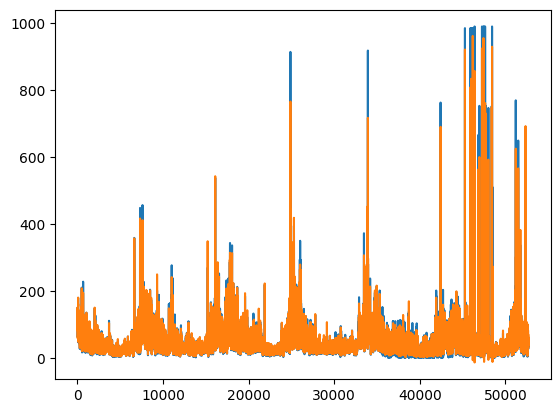

In [55]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.90709030243921


In [57]:
import joblib
joblib.dump(model, 'MadhyaPradesh_PM2.5_µgm³.pkl')

['MadhyaPradesh_PM2.5_µgm³.pkl']

In [58]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
pred_check2 = model.predict(X)

In [60]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9199118359725498


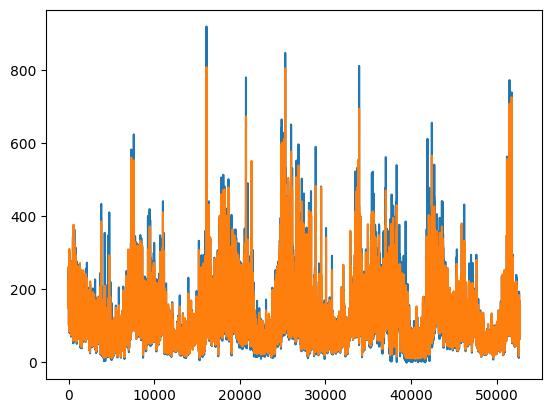

In [61]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [62]:
joblib.dump(model, 'MadhyaPradesh_PM10_µgm³.pkl')

['MadhyaPradesh_PM10_µgm³.pkl']